### Условие задачи

Блок-схема надежности некоторой ХТС представлена на рисунке. Элементы ХТС являются равнонадежными с вероятностью безотказной работы к моменту времени $t=20000$ часов $p_i(t)=0.85$.
С помощью графиков сравните показатели надежности элемента и системы. Что будет более эффективным с точки зрения увеличения
надежности:
-	Добавить в систему еще один резервный элемент
-	Уменьшить интенсивность отказов существующих элементов
на 10%? <br/>
Подтвердите свой ответ расчетами.

![Блок-схема](https://psv4.userapi.com/c534536/u132467062/docs/d33/9cfcc61209a1/blockshema.png?extra=bCEq4d9fblWtz7ACkjxq4IYIoptLQ84Cnqf6c3tSP-Zzb7_jiTGH9V1_n_HJV5Eajhjf5-wudHkhOJb8bN8SWs7-dQMkRa9c1gzySuLGu9FmM5hmI9uGrrePV9bCh3Oz1woj5JMIYggxFhvEthoc3iM)

### Решение задачи

In [9]:
# Подключение библиотек
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import comb
from scipy.integrate import quad
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [10]:
t1 = 20000 #часов
p_i = 0.85 #ВБР элемента

lambda_1 = -math.log (p_i)/t1

print('Интенсивность отказа элемента : %.4g' % (lambda_1))

Интенсивность отказа элемента : 8.126e-06


### Расчет с 6-ю элементами в системе

#### Функции для ВБР

In [11]:
def p(t):
    return np.exp(-lambda_1 * t) #функция ВБР элемента

def p_6 (t):
    return p(t)**6

def p_5 (t):
    return p(t)**5*(1-p(t))*comb(6, 5)

def p_4 (t):
    return p(t)**4*(1-p(t))**2*comb(6, 4)

def P(t):
    return p_6(t) + p_5(t) + p_4(t) #функция ВБР системы

#### Графики ВБР элемента и системы

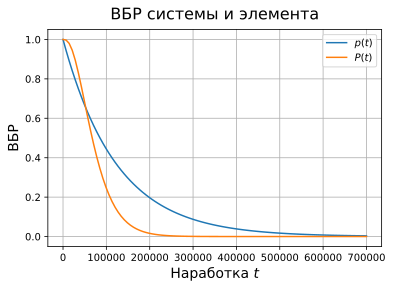

In [12]:
t = np.linspace(0, 700000, 100)

plt.plot(t, p(t), label=r'$p(t)$') #ВБР элемента
plt.plot(t, P(t), label=r'$P(t)$') #ВБР системы

plt.grid()
plt.xlabel('Наработка $t$', fontsize=14)
plt.ylabel('ВБР', fontsize=14)
plt.legend(loc='best')
plt.title('ВБР системы и элемента', y=1.02, fontsize=16);

#### Показатели при $t=20000$ часов

In [13]:
print('ВБР 6-и элементов: %.4g ' % (p_6(t1)))
print('ВБР 5-и элементов: %.4g ' % (p_5(t1)))
print('ВБР 4-х элементов: %.4g ' % (p_4(t1)))

ВБР 6-и элементов: 0.3771 
ВБР 5-и элементов: 0.3993 
ВБР 4-х элементов: 0.1762 


In [14]:
print('ВБР cистемы: %.4g ' % (P(t1)))

ВБР cистемы: 0.9527 


### Расчет с 7-ю элементами (+1 резервный)

#### Блок-схема надежности

![Блок-схема](https://psv4.userapi.com/c534536/u132467062/docs/d32/9fc0669a3ae2/blockshema2.png?extra=m3DYlplIW54xkm15cIZldKqeISH_uppv4uLPyT5RTEKr5HzxOkDX3TGwThMXPs7fsOCN_JvYU42jxyBhTnfWgCqPfj9FUE_U9FRCIWe898bUroDEBoz8kD_EOCjbfAGIUEsNWFsQCCSxh5-LGxCu9HI)

In [15]:
def p7 (t):
    return p(t)**7

def p6 (t):
    return p(t)**6*(1-p(t))*comb(7, 6)

def p5 (t):
    return p(t)**5*(1-p(t))**2*comb(7, 5)

def p4 (t):
    return p(t)**4*(1-p(t))**3*comb(7, 4)

def P_1(t):
    return p7(t) + p6(t) + p5(t) + p4(t) #функция ВБР системы

#### Показатели при $t=20000$ часов

In [16]:
print('ВБР 7-и элементов: %.4g ' % (p7(t1)))
print('ВБР 6-и элементов: %.4g ' % (p6(t1)))
print('ВБР 5-и элементов: %.4g ' % (p5(t1)))
print('ВБР 4-х элементов: %.4g ' % (p4(t1)))

ВБР 7-и элементов: 0.3206 
ВБР 6-и элементов: 0.396 
ВБР 5-и элементов: 0.2097 
ВБР 4-х элементов: 0.06166 


In [17]:
print('ВБР cистемы: %.4g ' % (P_1(t1)))

ВБР cистемы: 0.9879 


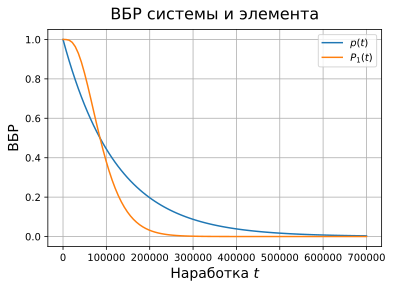

In [18]:
t = np.linspace(0, 700000, 100)

plt.plot(t, p(t), label=r'$p(t)$') #ВБР элемента
plt.plot(t, P_1(t), label=r'$P_1(t)$') #ВБР системы

plt.grid()
plt.xlabel('Наработка $t$', fontsize=14)
plt.ylabel('ВБР', fontsize=14)
plt.legend(loc='best')
plt.title('ВБР системы и элемента', y=1.02, fontsize=16);

### Расчет с изменением интенсивности отказов на 10%

In [19]:
lambda_2 = lambda_1 * 0.9 #уменьшение интенсивности отказов на 10%
print('Интенсивность отказа элемента: %.4g' % (lambda_2))

Интенсивность отказа элемента: 7.313e-06


In [20]:
def p_2(t):
    return np.exp(-lambda_2 * t)

print('ВБР элемента: %.4g ' % (p_2(t1)))

ВБР элемента: 0.8639 


In [21]:
def p2_6 (t):
    return p_2(t)**6

def p2_5 (t):
    return p_2(t)**5*(1-p_2(t))*comb(6, 5)

def p2_4 (t):
    return p_2(t)**4*(1-p_2(t))**2*comb(6, 4)

def P_2(t):
    return p2_6(t) + p2_5(t) + p2_4(t) #функция ВБР системы

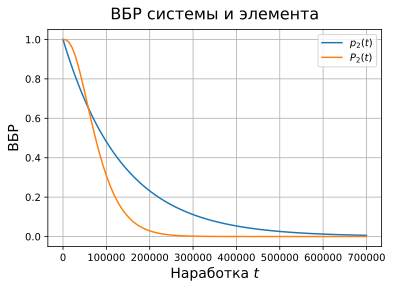

In [22]:
t = np.linspace(0, 700000, 100)

plt.plot(t, p_2(t), label=r'$p_2(t)$') #ВБР элемента
plt.plot(t, P_2(t), label=r'$P_2(t)$') #ВБР системы

plt.grid()
plt.xlabel('Наработка $t$', fontsize=14)
plt.ylabel('ВБР', fontsize=14)
plt.legend(loc='best')
plt.title('ВБР системы и элемента', y=1.02, fontsize=16);

#### Показатели при $t=20000$ часов

In [23]:
print('ВБР 6-и элементов: %.4g ' % (p2_6(t1)))
print('ВБР 5-и элементов: %.4g ' % (p2_5(t1)))
print('ВБР 4-х элементов: %.4g ' % (p2_4(t1)))

ВБР 6-и элементов: 0.4158 
ВБР 5-и элементов: 0.3929 
ВБР 4-х элементов: 0.1547 


In [24]:
print('ВБР cистемы: %.4g ' % (P_2(t1)))

ВБР cистемы: 0.9634 


### Расчет средней наработки до отказа

Средняя наработка до отказа системы: $$ T = \int\limits_0^\infty P(t) \,\mathrm{d}t $$

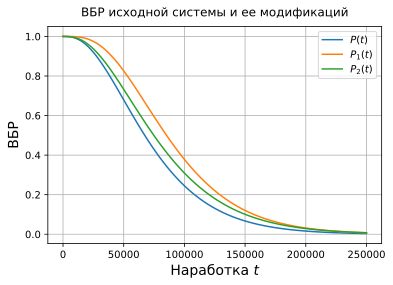

In [25]:
t = np.linspace(0, 250000, 100)

plt.plot(t, P(t), label = r'$P(t)$')
plt.plot(t, P_1(t), label = r'$P_1(t)$')
plt.plot(t, P_2(t), label = r'$P_2(t)$')

plt.grid();
plt.xlabel('Наработка $t$', fontsize=14)
plt.ylabel('ВБР', fontsize=14)
plt.legend(loc='best')
plt.title('ВБР исходной системы и ее модификаций', y = 1.02);

In [26]:
T, err = quad(P, 0, 250000)

print('Средняя наработка исходной системы до отказа : %.d часов' % (T))

T_1, err = quad(P_1, 0, 250000)

print('Средняя наработка системы с 7-ю элементами до отказа : %.d часов' % (T_1))

T_2, err = quad(P_2, 0, 250000)

print('Средняя наработка системы №3 до отказа : %.d часов' % (T_2))

Средняя наработка исходной системы до отказа : 75773 часов
Средняя наработка системы с 7-ю элементами до отказа : 93223 часов
Средняя наработка системы №3 до отказа : 84045 часов


### Наиболее надежный вариант - это добавление еще одного резервного элемента, потому что ВБР в этом случае самая наибольшая, а также и средняя наработка системы самая высокая.